<center><h1>Proyecto final</h1></center>
<center><h3>IBM SkillsBuild Europa - Análisis de datos</h3></center>

# Requisitos



* Conocimientos de Python, Power BI o Tableau.
* Comprensión de la limpieza de datos.
* Comprensión de la visualización de datos.



#### Nivel de ejercicio: Intermedio



#### Duración: aproximadamente 3 horas


### Análisis de datos de Airbnb:



#### Objetivo:



En este ejercicio, practicarás el análisis de datos sobre un conjunto de datos abiertos procedentes de Airbnb. Algunas de las tareas incluyen:

- limpieza de datos,
- transformación de datos y
- visualización de datos.



#### Resumen sobre los datos de Airbnb:



Los criterios principales de la gente cuando visita lugares nuevos son contar con alojamiento y comida a precios razonables. Airbnb (Air-Bed-Breakfast) es un mercado en línea creado para satisfacer esta necesidad, pues permite a la gente alquilar sus casas durante plazos cortos. Estos servicios se ofrecen a un precio relativamente inferior al de los hoteles y en diversas ubicaciones geográficas. Además, personas de todo el mundo prefieren el servicio hogareño y económico.



#### Fuente de los datos



Puedes obtener el <i>dataset</i> para realizar este proyecto en el siguiente enlace: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata



Este <i>dataset</i> contiene información sobre los alojamientos, tal como el barrio, el tipo de habitación, el precio, la disponibilidad, las opiniones, los gastos de servicio, la política de cancelación y las normas de uso de la casa.



¡Te deseamos lo mejor en tu análisis de los datos de Airbnb!

## Tarea 1: Carga de datos (Python)



1. Lee el fichero csv y cárgarlo en un <i>dataframe</i> de pandas.
2. Visualiza las cinco primeras filas de tu <i>dataframe</i>.
3. Visualize los tipos de datos de las columnas.

In [1]:
## Lee el fichero csv.

import pandas as pd
df = pd.read_csv('Airbnb_Open_Data.csv') 

/var/folders/35/0gy_dy0x0rl89l048zpc0wrm0000gn/T/ipykernel_74703/2046047914.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [2]:
## Muestra las primeras 5 filas.

df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [3]:
## Muestra los tipos de datos.

df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Tarea 2a: Limpieza de datos (cualquier herramienta)


1. Elimina las columnas no deseadas del <i>dataframe</i>, entre ellas se incluyen `host id`, `id`, `country` y `country code`.
2. Indica la razón por la cual se han eliminado estas columnas para tu análisis de datos.


Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla tomadas antes y después de eliminar las columnas.

In [4]:
## Una vez visualizadas las variables del dataframe, se eliminarán aquellas que, a priori, no aportan al análisis como son 'id' y 'host id', ya que no se va a trabajar con los identificadores
## únicos para nada. Asimismo, localizamos aquellas variables donde sólo exista un valor, ya que esto tampoco aportará a los análisis y procedemos con su eliminación.

# Identificamos columnas con un único valor
col_valor_unico = df.columns[df.nunique() == 1]

# Mostrar las columnas con un único valor
print("Columnas con un único valor:")
print(col_valor_unico)

Columnas con un único valor:
Index(['country', 'country code', 'license'], dtype='object')


In [5]:
## Ahora sí, procedemos con la eliminación:

df.drop(columns=["host id", "id", "country", "country code", "license"], axis=1, inplace=True)
df.head()

NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

  instant_bookable cancellation_policy        room type  ...  price  \
0            False              strict     Private room  ...  $966    
1            False            moderate  Entire home/apt  ...  $142    
2             True            flexible     Private room  ...  $620    
3             True            moderate  Entire home/apt  ...  $368    
4            False            moderate  Entire home/apt  ...  $204    

  service fee minimum nights  number of reviews  last review  \
0       $193            10.0                9.0   10/19/2021   
1        $28            30.0               45.0    5/21/2022   
2       $124             3.0                0.0          NaN   
3        $74            30.0              270.0     7/5/2019   
4        $41            10.0                9.0   11/19/2018   

  reviews per month  review rate number  calculated host listings count  \
0              0.21                 4.0                             6.0   
1              0.38                 4.0                             2.0   
2               NaN                 5.0                             1.0   
3              4.64                 4.0                             1.0   
4              0.10                 3.0                             1.0   

   availability 365                                        house_rules  
0             286.0  Clean up and treat the home the way you'd like...  
1             228.0  Pet friendly but please confirm with me if the...  
2             352.0  I encourage you to use my kitchen, cooking and...  
3             322.0                                                NaN  
4             289.0  Please no smoking in the house, porch or on th...  

[5 rows x 21 columns]

## Tarea 2b: Limpieza de datos (Python)


- Compueba si hay valores nulos y muestra el recuento en orden ascendente. **Si faltan valores, imputa los valores como consideres.**
- Comprueba si hay valores duplicados y elimínalos.
- Muestra el número total de registros antes y después de eliminar los duplicados.

In [6]:
## Compruobamos si hay valores nulos y mostramos el recuento en orden ascendente.
df.isnull().sum().sort_values()

# Se observa que la única columna que no tiene valores nulos es room type.

room type                             0
lat                                   8
long                                  8
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  76
instant_bookable                    105
number of reviews                   183
Construction year                   214
price                               247
NAME                                250
service fee                         273
host_identity_verified              289
calculated host listings count      319
review rate number                  326
host name                           406
minimum nights                      409
availability 365                    448
reviews per month                 15879
last review                       15893
house_rules                       52131
dtype: int64

In [7]:
## Comprobamos si hay valores duplicados:

df.duplicated().sum()

3436

In [8]:
## Mostramos el número total de registros antes de eliminar los duplicados:

df.shape


(102599, 21)

In [10]:
## Eliminamos duplicados:

df.drop_duplicates(inplace=True)

In [11]:
## Comprobamos de nuevo si hay valores duplicados:

df.duplicated().sum()

0

In [12]:
## Mostramos el número total de registros después de eliminar los duplicados:
df.shape


(99163, 21)

## Tarea 3: Transformación de datos (cualquier herramienta)





- Cambia el nombre de la columna `availability 365` a `days_booked`.
- Convierte todos los nombres de columna a minúsculas y sustituye los espacios en los nombres de columna por un guión bajo "_".
- Elimina el signo de dólares y la coma de las columnas `price` y `service_fee`. Si es necesario, convierte estas dos columnas al tipo de datos adecuado.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [13]:
## Cambiamos el nombre de la columna 'availability 365' a 'days_booked'.

df.rename(columns={'availability 365': 'days_booked'}, inplace=True)

In [14]:
## Comprobamos que  se ha realizado el cambio de nombre:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99163 entries, 0 to 102057
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            98913 non-null  object 
 1   host_identity_verified          98874 non-null  object 
 2   host name                       98771 non-null  object 
 3   neighbourhood group             99134 non-null  object 
 4   neighbourhood                   99147 non-null  object 
 5   lat                             99155 non-null  float64
 6   long                            99155 non-null  float64
 7   instant_bookable                99058 non-null  object 
 8   cancellation_policy             99087 non-null  object 
 9   room type                       99163 non-null  object 
 10  Construction year               98949 non-null  float64
 11  price                           98916 non-null  object 
 12  service fee                     9889

In [15]:
## Convierte todos los nombres de columna a minúsculas y sustituye los espacios por un guión bajo "_".

df.columns = [col.lower().replace(" ", "_") for col in df.columns]

## Comrpobamos cómo queda:

df.columns

Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules'],
      dtype='object')

In [16]:
## Eliminamos el signo de dólares y la coma de las columnas 'price' y 'service_fee' y convertimos estas dos columnas al tipo de datos adecuado.

## Importamos la librería numpy y creamos una función para la eliminación de los caracteres '$' y ',', así como para transformar los valores en tipo float: 

import numpy as np

def elimina_dolar_coma(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",",""))

In [17]:
## Aplicamos la función a la columna 'price':

df['price'] = df['price'].apply(lambda x: elimina_dolar_coma(x))
df[['price']]

price
0        966.0
1        142.0
2        620.0
3        368.0
4        204.0
...        ...
102053   696.0
102054   909.0
102055   387.0
102056   848.0
102057  1128.0

[99163 rows x 1 columns]

In [18]:
## Aplicamos la función a la columna 'service_fee':

df['service_fee'] = df['service_fee'].apply(lambda x: elimina_dolar_coma(x))
df[['service_fee']]

service_fee
0             193.0
1              28.0
2             124.0
3              74.0
4              41.0
...             ...
102053          NaN
102054          NaN
102055          NaN
102056          NaN
102057          NaN

[99163 rows x 1 columns]

### Tarea 4: Análisis exploratorio de datos (cualquier herramienta)



- Enumera los tipos de habitaciones disponibles en el <i>dataset</i>.
- ¿Qué tipo de habitación tiene la política de cancelación más estricta?
- Enumera el precio medio por barrio y señala cuál es el conjunto de barrios más caro para alquilar.



Si utilizas Python para este ejercicio, incluye el código que hayas utilizado en las celdas siguientes. Si utilizas cualquier otra herramienta, incluye capturas de pantalla de tu trabajo.

In [19]:
## Enumeramos los tipos de habitaciones disponibles en Airbnb y realizamos un conteo:

df['room_type'].value_counts()

room_type
Entire home/apt    52003
Private room       44895
Shared room         2150
Hotel room           115
Name: count, dtype: int64

In [20]:
## Para averiguar qué tipo de habitación se adhiere a una política de cancelación más estricta:

## Hay dos posibilidades:

## 1. El tipo de habitación con mayor número de habitaciones donde 'cancellation_policy' == 'strict'. Para lo cual generamos un df donde 'cancellation_policy' == 'strict' 
## y vuelvo a contar por tipo de habitación pero para este nuevo df_strict:

df_strict = df[df['cancellation_policy'] == 'strict']
df_strict['room_type'].value_counts()

## Obteniendo que el 'room_type' = 'Entire home/apt' es el tipo con mayor número de habitaciones con 'cancellation_policy' == 'strict'.

room_type
Entire home/apt    17241
Private room       14937
Shared room          718
Hotel room            34
Name: count, dtype: int64

In [21]:
## 2. El tipo de habitación con una moda para 'cancellation_policy' == 'strict' mayor. Para lo cual agrupamos el df_cancel_by_type por el tipo de habitación ('room type') y luego se aplica una  
## función que calcula la moda (valor más común) de la política de cancelación en cada grupo. Este código imprime la política de cancelación más común para cada tipo de habitación. 

df_cancel_by_type = df.groupby('room_type')['cancellation_policy'].apply(lambda x: x.mode().iloc[0])
print("Política de cancelación por tipo de habitación:")
print(df_cancel_by_type)

## Donde resulta que el 'room_type' = 'Shared room' es el tipo con mayor frecuencia de habitaciones con 'cancellation_policy' == 'strict'.

Política de cancelación por tipo de habitación:
room_type
Entire home/apt    flexible
Hotel room         flexible
Private room       moderate
Shared room          strict
Name: cancellation_policy, dtype: object


In [22]:
## Precio promedio por barrio

# En primer lugar, dado que 'price' tiene 247 valores null y aunque esto supone un porcentaje bajo, vamos a imputar esos valores por el valor promedio:

# 1. Calculamos el valor promedio de 'price':

media_price = df['price'].mean()
media_price

625.2653665736584

In [23]:
# 2. Reemplazamos los valors nulos por la media obtenida:

df['price'].fillna(media_price, inplace=True)

# Comprobamos que ya no existen nuelos en 'price':

df['price'].isnull().sum()

0

In [24]:
## 3. Ahora ya podemos calcular los promedios

df_price_by_nbh=df['price'].groupby(df['neighbourhood']).mean().sort_values(ascending=False)
df_price_by_nbh

## El barrio más caro es 'New Dorp' con un alquiler promedio de $1045,3.

neighbourhood
New Dorp                      1045.333333
Chelsea, Staten Island        1042.000000
Fort Wadsworth                1024.000000
Little Neck                    817.750000
Jamaica Hills                  812.904762
                                 ...     
Rossville                      327.500000
Breezy Point                   309.888889
Spuyten Duyvil                 307.000000
Bay Terrace, Staten Island     306.000000
Lighthouse Hill                107.666667
Name: price, Length: 224, dtype: float64

In [25]:
# Precio promedio por grupo de barrio

df_price_by_nbh_group= df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
df_price_by_nbh_group

# Donde el grupo de barrio con alquileres más caros en promedio es Queens con $629,7.

neighbourhood_group
Queens           629.701305
Bronx            626.610802
Staten Island    626.428039
Brooklyn         626.425514
Manhattan        622.690482
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

## Tarea 5a: Visualización de datos (Cualquier herramienta)

* Enumerar los distintos tipos de habitaciones disponibles en Airnb
* Qué tipo de habitación se adhiere a una política de cancelación más estricta.
* Enumere los precios por grupo de barrios y mencione también cuál es el grupo de barrios más caro para los alquileres.
* Enumere los 10 barrios más caros por orden creciente de precio con la ayuda de un gráfico de barras horizontales. ¿Cuál es el barrio más barato?
* Enumere los barrios que ofrecen alquileres a corto plazo de menos de 10 días. Ilustrar con un gráfico de barras
* Enumere los precios con respecto al tipo de habitación utilizando un gráfico de barras y exponga también sus inferencias.
* Cree un gráfico circular que muestre la distribución de los días reservados para cada grupo de barrios.

Si utiliza Python para este ejercicio, por favor incluya el código en las celdas de abajo. Si utiliza cualquier otra herramienta, por favor incluya pantallazos de su trabajo.

In [26]:
## Enumerar los distintos tipos de habitaciones disponibles en Airnb

# Identificamos los distintos valores de la columna 'room_type':

room_type_values = df['room_type'].unique()

# Mostrar los valores
print("Tipos de habitación:")
print(room_type_values)

Tipos de habitación:
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


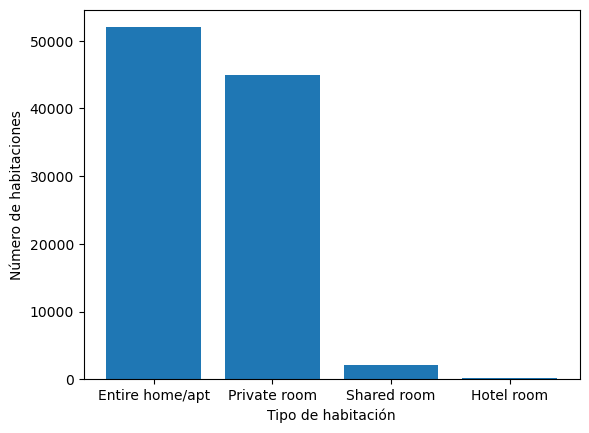

In [27]:
# Visualizo una distribución del recuento de habitaciones por tipo:

import matplotlib.pyplot as plt

# Definimos el eje y:

room_type_recuento = df['room_type'].value_counts()

# Creamos un bar chart

plt.bar(room_type_recuento.index, room_type_recuento.values)

# Añadimos títulos de ejes:

plt.xlabel('Tipo de habitación')
plt.ylabel('Número de habitaciones')

# Pintamos la visualización
plt.show()


/var/folders/35/0gy_dy0x0rl89l048zpc0wrm0000gn/T/ipykernel_74703/1600162792.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df_strict, palette='deep')


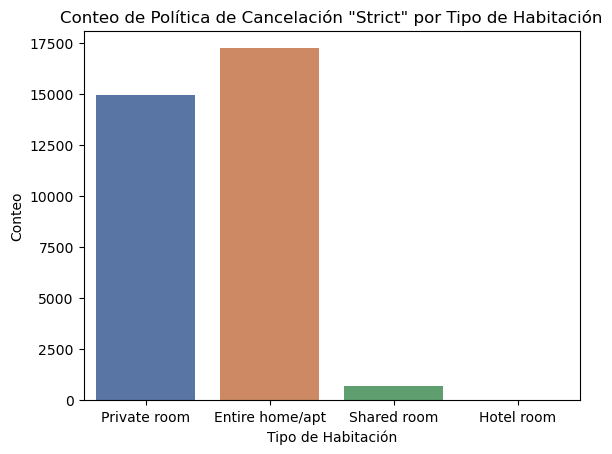

In [28]:
## ¿Qué tipo de habitación se adhiere a una política de cancelación más estricta?

## Como vimos anteriormente, esta pregunta podría interpretarse desde don puntos de vista: 
## 1. El tipo de habitación con mayor número de habitaciones donde 'cancellation_policy' == 'strict'
## 2. El tipo de habitación con una moda para 'cancellation_policy' == 'strict' mayor. 

## En este caso optaremos por el enfoque 1:

import seaborn as sns

# Filtramos por 'cancellation_policy' = 'strict'
df_strict = df[df['cancellation_policy'] == 'strict']

# Creamos un gráfico de barras
sns.countplot(x='room_type', data=df_strict, palette='deep')

# Ajustamos el título y etiquetas de ejes
plt.title('Conteo de Política de Cancelación "Strict" por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.show()

/var/folders/35/0gy_dy0x0rl89l048zpc0wrm0000gn/T/ipykernel_74703/2358302661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='neighbourhood_group', y='price', data=df, errorbar=None, estimator='mean', order=df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).index, palette='Set2')


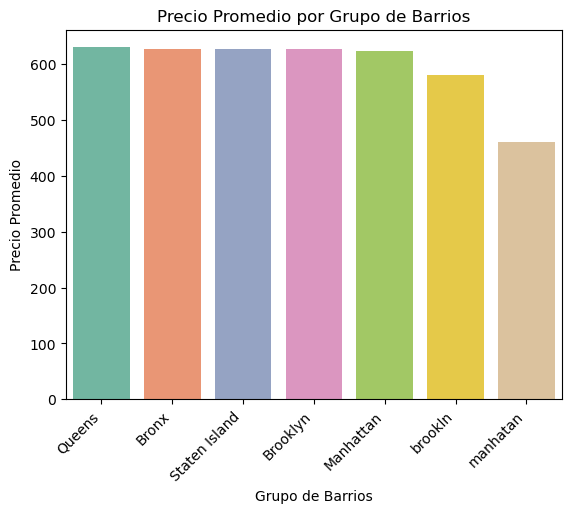

In [29]:
## Enumere los precios por grupo de barrios y mencione también cuál es el grupo de barrios más caro para los alquileres.


# Crear un gráfico de barras
ax = sns.barplot(x='neighbourhood_group', y='price', data=df, errorbar=None, estimator='mean', order=df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).index, palette='Set2')

# Añadir título y etiquetas
plt.title('Precio Promedio por Grupo de Barrios')
plt.xlabel('Grupo de Barrios')
plt.ylabel('Precio Promedio')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

/var/folders/35/0gy_dy0x0rl89l048zpc0wrm0000gn/T/ipykernel_74703/345216898.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio_por_barrio, y=precio_promedio_por_barrio.index, palette='viridis')


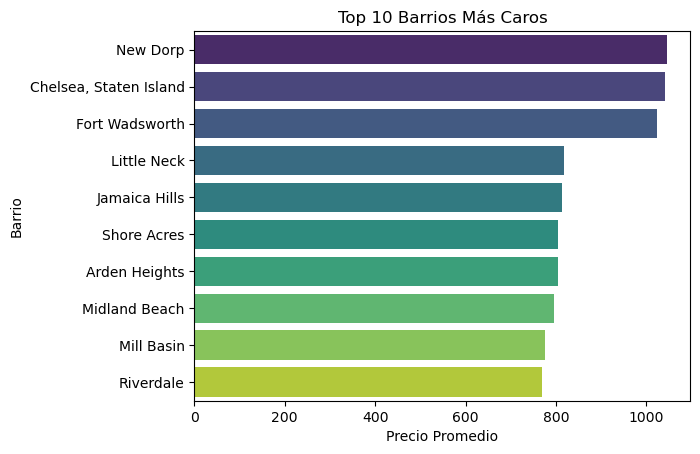

In [30]:
## Enumere los 10 barrios más caros por orden creciente de precio con la ayuda de un gráfico de barras horizontales. ¿Cuál es el barrio más barato?

# Calcular el precio promedio por barrio
precio_promedio_por_barrio = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

# Crear un gráfico de barras horizontales
sns.barplot(x=precio_promedio_por_barrio, y=precio_promedio_por_barrio.index, palette='viridis')

# Añadir título y etiquetas
plt.title('Top 10 Barrios Más Caros')
plt.xlabel('Precio Promedio')
plt.ylabel('Barrio')

# Mostrar el gráfico
plt.show()

In [31]:
# Obtener el barrio más barato
barrio_mas_barato = df.groupby('neighbourhood')['price'].mean().idxmin()
print(f"El barrio más barato es: {barrio_mas_barato}")

El barrio más barato es: Lighthouse Hill


In [32]:
## Enumere los barrios que ofrecen alquileres a corto plazo de menos de 10 días. Ilustrar con un gráfico de barras

## En primer lugar vamosa ver cuántos barrios ofrecen alquileres de menos de 10 días y cuántos no:

# Obtenemos el total de barrios
total_barrios = df['neighbourhood'].nunique()

# Mostramos el total de barrios:
print(f"Total de barrios: {total_barrios}")

# Filtramos el DataFrame para incluir solo alquileres a corto plazo de menos de 10 días
df_corto_plazo = df[df['minimum_nights'] < 10]

# Obtenemos el total de barrios que NO ofrecen alquileres de menos de 10 días
barrios_sin_alquiler_corto_plazo = total_barrios - df_corto_plazo['neighbourhood'].nunique()

# Mostramos el total de barrios que NO ofrecen alquileres de menos de 10 días
print(f"Total de barrios que NO ofrecen alquileres de menos de 10 días: {barrios_sin_alquiler_corto_plazo}")

Total de barrios: 224
Total de barrios que NO ofrecen alquileres de menos de 10 días: 0


In [33]:
# Debido a que todos los barrios ofrecen alquileres de menos de 10 días y el total de barrios es de 224, 
# la visualización de todos los barrios quedará bastante pequeña, por lo que se acompañará de un listado 
# de conteo ordenado de mayor a menor.

/var/folders/35/0gy_dy0x0rl89l048zpc0wrm0000gn/T/ipykernel_74703/401167923.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_corto_plazo_por_barrio.values, y=conteo_corto_plazo_por_barrio.index, palette='viridis')


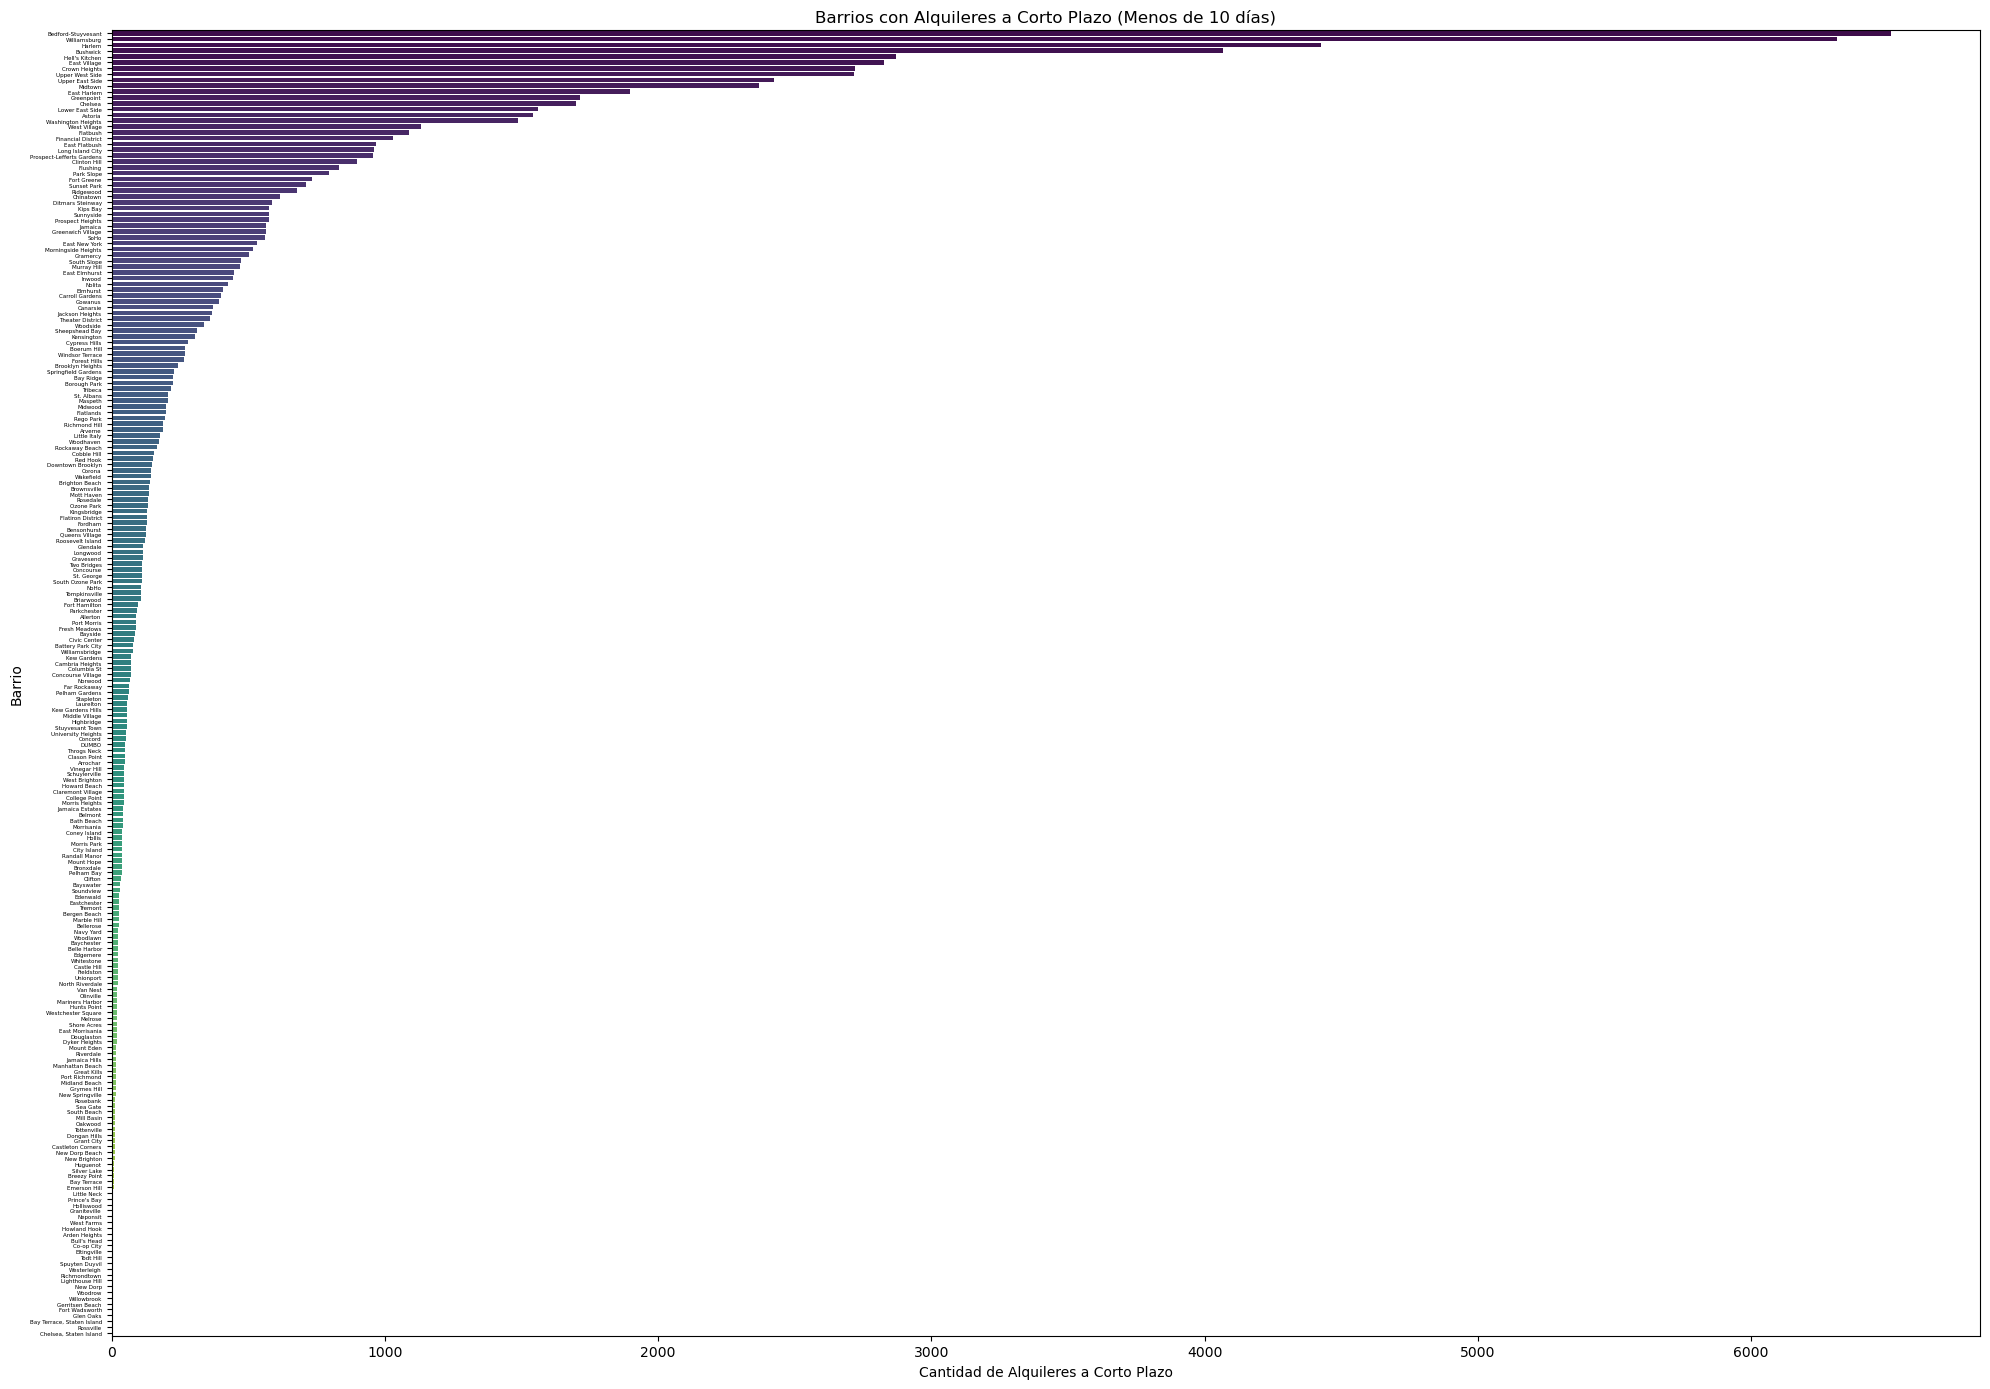

Barrios con alquileres a corto plazo de menos de 10 días:
['Bedford-Stuyvesant', 'Williamsburg', 'Harlem', 'Bushwick', "Hell's Kitchen", 'East Village', 'Crown Heights', 'Upper West Side', 'Upper East Side', 'Midtown', 'East Harlem', 'Greenpoint', 'Chelsea', 'Lower East Side', 'Astoria', 'Washington Heights', 'West Village', 'Flatbush', 'Financial District', 'East Flatbush', 'Long Island City', 'Prospect-Lefferts Gardens', 'Clinton Hill', 'Flushing', 'Park Slope', 'Fort Greene', 'Sunset Park', 'Ridgewood', 'Chinatown', 'Ditmars Steinway', 'Kips Bay', 'Sunnyside', 'Prospect Heights', 'Jamaica', 'Greenwich Village', 'SoHo', 'East New York', 'Morningside Heights', 'Gramercy', 'South Slope', 'Murray Hill', 'East Elmhurst', 'Inwood', 'Nolita', 'Elmhurst', 'Carroll Gardens', 'Gowanus', 'Canarsie', 'Jackson Heights', 'Theater District', 'Woodside', 'Sheepshead Bay', 'Kensington', 'Cypress Hills', 'Boerum Hill', 'Windsor Terrace', 'Forest Hills', 'Brooklyn Heights', 'Springfield Gardens', 'Bay

In [33]:
# Filtramos el DataFrame para incluir solo alquileres a corto plazo de menos de 10 días:
df_corto_plazo = df[df['minimum_nights'] < 10]

# Contamos la cantidad de alquileres a corto plazo por barrio:
conteo_corto_plazo_por_barrio = df_corto_plazo['neighbourhood'].value_counts()

# Creamos un gráfico de barras:
plt.figure(figsize=(20, 14))
sns.barplot(x=conteo_corto_plazo_por_barrio.values, y=conteo_corto_plazo_por_barrio.index, palette='viridis')

# Añadimos título y etiquetas de ejes:
plt.title('Barrios con Alquileres a Corto Plazo (Menos de 10 días)')
plt.xlabel('Cantidad de Alquileres a Corto Plazo')
plt.ylabel('Barrio')

# Ajustamos el tamaño de las etiquetas:
plt.yticks( fontsize=4)

# Ajustamos el espaciado para evitar solapamiento
plt.tight_layout()

# Mostramos el gráfico
plt.show()

# Enumeramos los barrios que ofrecen alquileres a corto plazo de menos de 10 días
barrios_corto_plazo = conteo_corto_plazo_por_barrio.index.tolist()
print("Barrios con alquileres a corto plazo de menos de 10 días:")
print(barrios_corto_plazo)



In [34]:
# Listado + conteo:

# Configurar pandas para mostrar todas las filas en la salida
pd.set_option('display.max_rows', None)

# Obtener la lista de barrios y su cantidad de alojamientos disponibles ordenados de mayor a menor por recuento
barrios_con_alojamientos = pd.DataFrame({'Barrio': conteo_corto_plazo_por_barrio.index, 'Cantidad de Alojamientos': conteo_corto_plazo_por_barrio.values})
barrios_con_alojamientos = barrios_con_alojamientos.sort_values(by='Cantidad de Alojamientos', ascending=False)

# Mostrar la lista de barrios con la cantidad de alojamientos disponibles (ordenado de mayor a menor por recuento)
print("Barrios con alquileres a corto plazo de menos de 10 días y cantidad de alojamientos disponibles (ordenado de mayor a menor por recuento):")
print(barrios_con_alojamientos)

Barrios con alquileres a corto plazo de menos de 10 días y cantidad de alojamientos disponibles (ordenado de mayor a menor por recuento):
                         Barrio  Cantidad de Alojamientos
0            Bedford-Stuyvesant                      6512
1                  Williamsburg                      6314
2                        Harlem                      4425
3                      Bushwick                      4067
4                Hell's Kitchen                      2869
5                  East Village                      2826
6                 Crown Heights                      2720
7               Upper West Side                      2716
8               Upper East Side                      2426
9                       Midtown                      2371
10                  East Harlem                      1899
11                   Greenpoint                      1716
12                      Chelsea                      1698
13              Lower East Side                   

/var/folders/35/0gy_dy0x0rl89l048zpc0wrm0000gn/T/ipykernel_74703/3290853468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='Set1')


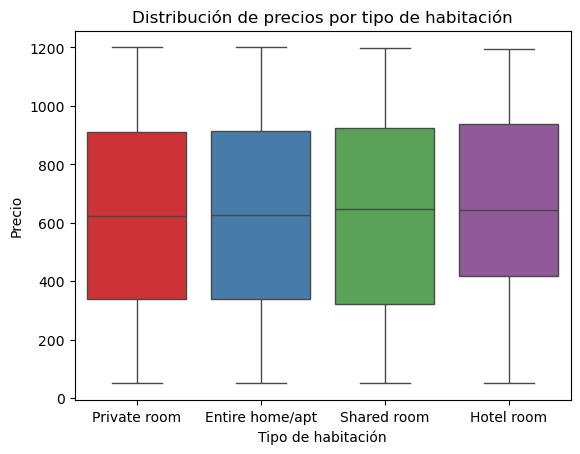

In [35]:
## Enumere los precios con respecto al tipo de habitación utilizando un gráfico de barras y exponga también sus 
## inferencias.

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de caja
sns.boxplot(x='room_type', y='price', data=df, palette='Set1')

# Personalizar el gráfico
plt.xlabel('Tipo de habitación')
plt.ylabel('Precio')
plt.title('Distribución de precios por tipo de habitación')

# Mostrar el gráfico
plt.show()

In [ ]:
## Observaciones:

# Diferencias en la Mediana (Línea dentro de la Caja): La línea en el centro de cada caja representa la mediana de 
# los precios para cada tipo de habitación. Se pueden observar pequeñas diferencias en las medianas entre los 
# diferentes tipos de habitación. Si una mediana está más alta o baja que las demás, puede indicar diferencias en 
# los precios medios.

# Dispersión de Datos (Cajas): La caja en sí misma representa el rango intercuartílico (IQR), que abarca el 50% 
# central de los datos. Se puede observar la dispersión de los precios dentro de cada tipo de habitación. Si una 
# caja es más larga, indica mayor variabilidad en los precios. En el caso que nos ocupa, la mayor variabilidad aparece 
# en el tipo de habitación 'Shared_room'. 

# Valores Atípicos (Bigotes): Los bigotes del gráfico de cajas muestran la variabilidad más allá del IQR. Se puede
# identificar si hay valores atípicos (outliers) que se encuentran fuera de los bigotes. Estos valores podrían ser 
# puntos aislados con precios inusualmente altos o bajos.

# Comparación entre Tipos de Habitación: Se puede comparar fácilmente la distribución de precios entre los 
# diferentes tipos de habitación. Aparentemente, los rangos de precios entre habitaciones son muy similares.

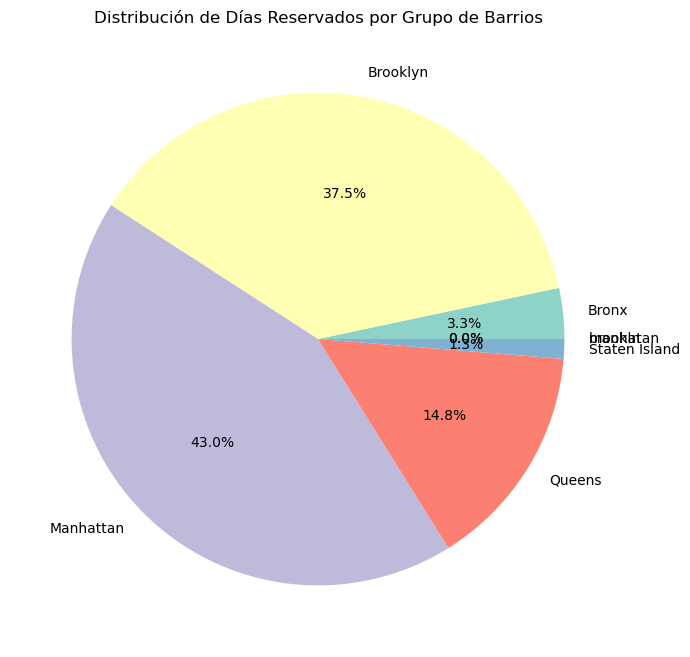

In [36]:
## Cree un gráfico circular que muestre la distribución de los días reservados para cada grupo de barrios.

# Filtramos los valores nulos de las columas 'days_booked' y 'neighbourhood_group'
df_filtered = df[['days_booked', 'neighbourhood_group']].dropna()

# Calculamos la suma de días reservados por grupo de barrios
dias_por_grupo = df_filtered.groupby('neighbourhood_group')['days_booked'].sum()

# Creamos el gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(dias_por_grupo, labels=dias_por_grupo.index, autopct='%1.1f%%', startangle=0, colors=plt.cm.Set3.colors)

# Añadimos título
plt.title('Distribución de Días Reservados por Grupo de Barrios')

# Mostramos el gráfico
plt.show()

## Tarea 5b: Visualización de datos (Cualquier herramienta)

* ¿El precio del servicio y el precio de la habitación tienen un impacto mutuo? Ilustre esta relación con un gráfico de dispersión e indique sus inferencias
* Utilizando un gráfico lineal muestre en qué año tuvo lugar la máxima construcción de habitaciones.

Si utiliza Python para este ejercicio, incluya el código en las celdas siguientes. Si utiliza cualquier otra herramienta, incluya capturas de pantalla de su trabajo.

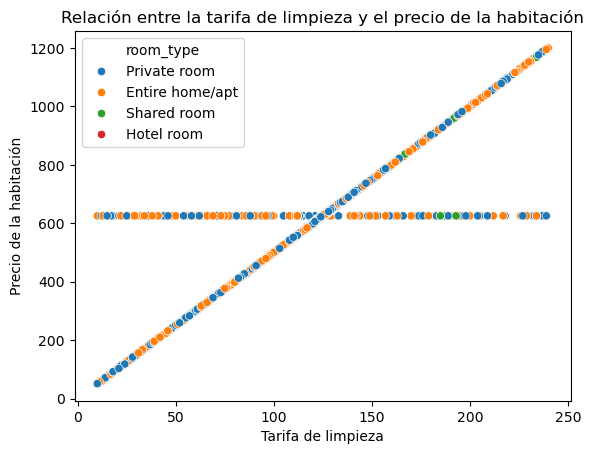

In [37]:
## ¿El precio del servicio y el precio de la habitación tienen un impacto mutuo? Ilustre esta relación con un 
## gráfico de dispersión e indique sus inferencias


# Creamos el gráfico de dispersión
sns.scatterplot(data=df, x='service_fee', y='price', hue='room_type')

# Personalizamos el gráfico
plt.xlabel('Tarifa de limpieza')
plt.ylabel('Precio de la habitación')
plt.title('Relación entre la tarifa de limpieza y el precio de la habitación') 

# Mostramos el gráfico
plt.show()

In [38]:
correlation = df['service_fee'].corr(df['price'])
print('Coeficiente de correlación:', correlation)

Coeficiente de correlación: 0.9990349602210963


In [87]:
# A partir del gráfico y del índice de correlación, se puede deducir que existe una relación positiva entre la variable price y la variable service_fee ya que si una aumenta 
# la otra también lo hace. Cabe destacar el conjunto de puntos que describen una líne recta con pendiente 0 (una constante), la cual surge de la imputación del valor promedio 
# de price a los valores nulos que existían, sin embargo son datos controlados que no afectan al análisis realizado.
#
# Se crea además el siguiente gráfico con tooltip para corroborar este extremo, donde se puede comprobar que el mismo valor de price corresponde a varios de  service_fee, 
# y dicho valor es igua lal valo promedio que se calculó anteriormente.

In [39]:
import plotly.express as px
# Filtrar valores nulos
df_filtered = df[['service_fee', 'price']].dropna()

# Crear un gráfico de dispersión interactivo con Plotly Express
fig = px.scatter(df_filtered, x='service_fee', y='price', title='Relación entre Precio del Servicio y Precio de la Habitación')
fig.update_layout(xaxis_title='Precio del Servicio', yaxis_title='Precio de la Habitación')

# Mostrar el gráfico interactivo
fig.show()

Text(0, 0.5, 'Número de Construcciones')

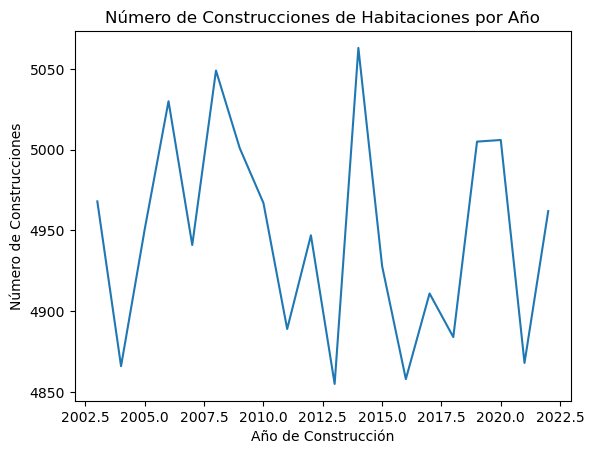

In [40]:
## Utilizando un gráfico lineal muestre en qué año tuvo lugar la máxima construcción de habitaciones.

# Filtramos valores nulos en la columna 'Construction year'
df_filtered = df.dropna(subset=['construction_year'])

# Contamos el número de construcciones por año
constructions_by_year = df_filtered['construction_year'].value_counts().sort_index()

# Creamos un gráfico de línea
sns.lineplot(x=constructions_by_year.index, y=constructions_by_year.values)

# Añadimos título y etiquetas
plt.title('Número de Construcciones de Habitaciones por Año')
plt.xlabel('Año de Construcción')
plt.ylabel('Número de Construcciones')

## Tarea 5c: Visualización de datos (Cualquier herramienta)

* Con la ayuda de gráficos de caja ilustra lo siguiente
 * Efecto del número de tasa de revisión en el precio
 * Efecto de la identidad del host verificada en el precio

Si utiliza Python para este ejercicio, por favor incluya el código en las celdas de abajo. Si utiliza cualquier otra herramienta, por favor incluya capturas de pantalla de su trabajo.

/var/folders/35/0gy_dy0x0rl89l048zpc0wrm0000gn/T/ipykernel_74703/886348311.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='review_rate_number', ylabel='price'>

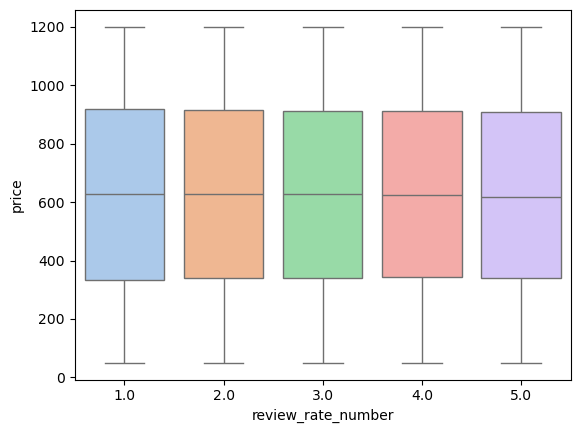

In [41]:
## Efecto del número de tasa de revisión en el precio

sns.boxplot(x='review_rate_number', y='price', data=df, palette='pastel')

In [42]:
## Efecto de la identidad del host verificada en el precio

df[['host_identity_verified']].value_counts()

host_identity_verified
unconfirmed               49492
verified                  49382
Name: count, dtype: int64

In [43]:
# Filtramos los datos para obtener solo verified
verified = df[df['host_identity_verified'] == 'verified']

# Filtramos los datos para obtener solo anfitriones unconfirmed
unconfirmed = df[df['host_identity_verified'] == 'unconfirmed']

/var/folders/35/0gy_dy0x0rl89l048zpc0wrm0000gn/T/ipykernel_74703/3747540693.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




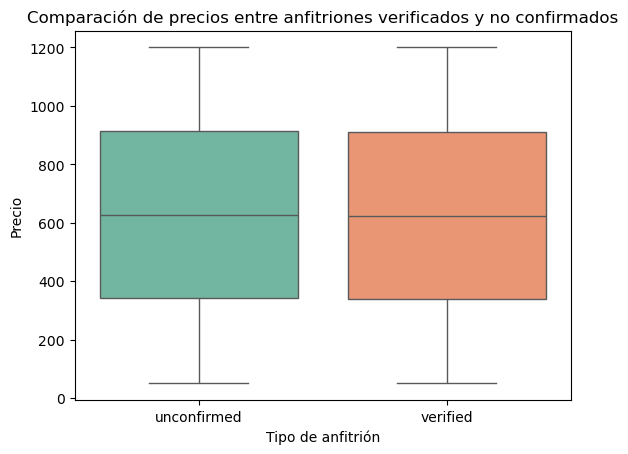

In [44]:
sns.boxplot(x='host_identity_verified', y='price', data=df, palette='Set2')

# Personalizar el gráfico
plt.xlabel('Tipo de anfitrión')
plt.ylabel('Precio')
plt.title('Comparación de precios entre anfitriones verificados y no confirmados')

# Mostrar el gráfico
plt.show()
